## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'brystene'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2011072508088,"Ambjørnsen, Ingvar",Elling,2005
1,2013012206024,"Holmen, Liv",Så nær -,1980
2,2011021120013,"Brown, Carter",Manen uten hode,1975
3,2016021008086,"Steel, Danielle",Mødrenes synder,2013
4,2012061906086,"Cornwell, Bernard",Jarlene fra nord,2010
5,2013102906037,"De Leeuw, Jan",Midtsommernattshav,2008
6,2012062505053,"Spurkland, Stein Inge",Og det ble mørkt,2011
7,2013022606170,"Elster, Torolf",Thomas Pihls annen lov,1982
8,2013072308107,"Masterson, Louis",Duell i Tombstone,1980
9,2014100308009,"Thørring, Jorun",Glassdukkene,2007


In [10]:
nb.urn_concordance(word=collword, urns=korpus)

"Elling, Ambjørnsen, Ingvar, 2005",None,brystene,. Likevel vil jeg ikke
"Elling, Ambjørnsen, Ingvar, 2005",", en gardin ned mot",brystene,", en annen over ryggen"
"Elling, Ambjørnsen, Ingvar, 2005",var ute etter å kryste,brystene,hennes på en ufolsom måte
"Elling, Ambjørnsen, Ingvar, 2005",Eller kjælte kun simpelthen med,brystene,"sine , uten å tenke"
"Elling, Ambjørnsen, Ingvar, 2005",ikke hadde forsøkr å beføle,brystene,hennes . Det eneste som
"Så nær -, Holmen, Liv, 1980",Ser den brune linjen mellom,brystene,None
"Manen uten hode, Brown, Carter, 1975",Under den svarte buksedressen var,brystene,hennes overraskende store og faste
"Manen uten hode, Brown, Carter, 1975",temmelig gjennomsiktig . De store,brystene,"avtegnet seg i detalj ,"
"Manen uten hode, Brown, Carter, 1975",Hun la hendene ! under,brystene,", og løftet dem mot"
"Manen uten hode, Brown, Carter, 1975",unødvendig støtte til de faste,brystene,hennes . I den andre
"Manen uten hode, Brown, Carter, 1975",Han la hendene over,brystene,"hennes , og klemte dem"


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
",",1435
.,1354
og,1233
hennes,903
de,648


In [15]:
large.head()

,0
.,2790
",",2590
og,2122
hennes,1135
de,837


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
hopper,5,5,1.000000
fortvilet,3,3,1.000000
Juliet,4,4,1.000000
ivrig,4,4,1.000000
kløp,4,4,1.000000
...,...,...,...
vannet,8,13,0.615385
merket,8,13,0.615385
grep,30,49,0.612245
når,22,36,0.611111


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",1435,2590,0.554054
.,1354,2790,0.485305
og,1233,2122,0.581056
!,26,68,0.382353
?,115,260,0.442308


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
kløften,33,34,0.970588
fyldige,43,45,0.955556
fulle,21,22,0.954545
struttende,15,16,0.937500
klemt,13,14,0.928571
førte,13,14,0.928571
skjulte,11,12,0.916667
hevet,22,24,0.916667
spisse,21,23,0.913043
kors,10,11,0.909091


In [26]:
delta_const

,small,large,ratio
hopper,5,5,1.000000
fortvilet,3,3,1.000000
Juliet,4,4,1.000000
ivrig,4,4,1.000000
kløp,4,4,1.000000
...,...,...,...
vannet,8,13,0.615385
merket,8,13,0.615385
grep,30,49,0.612245
når,22,36,0.611111


In [27]:
delta_max.head(50).index

Index(['kløften', 'fyldige', 'fulle', 'struttende', 'klemt', 'førte',
       'skjulte', 'hevet', 'spisse', 'kors', 'fremhevet', 'perfekte', 'mine',
       'avdekket', 'nakne', 'høye', 'kjæle', 'streifet', 'klemme', 'kvinnen',
       'dine', 'kjærtegne', 'blottet', 'dekket', 'kjenner', 'dekke',
       'utringning', 'melk', 'mellom', 'slappe', 'masserte', 'klemte',
       'skyggen', 'skjøt', 'glødet', 'sitter', 'ømme', 'disset', 'fri', 'latt',
       'kvinner', 'sine', 'klistret', 'avslørte', 'begge', 'små', 'trykket',
       'kilte', 'berørte', 'praktfulle'],
      dtype='object')

In [28]:
delta_const.head(50).index

Index(['hopper', 'fortvilet', 'Juliet', 'ivrig', 'kløp', 'øverste', 'hengende',
       'glodde', 'beskytte', 'kna', 'strammer', 'beføle', 'formen', 'Harry',
       'strittet', 'dyna', 'duvet', 'T-skjorta', 'bekk', 'dinglet', 'sved',
       'druer', 'stønn', 'tunikaen', 'snart', 'krafset', 'syne', 'Her',
       'kriblet', 'berøringen', 'fritt', 'plasserte', 'svulmet', 'massere',
       'bite', 'kvinnelige', 'frigjorde', 'pekte', 'automatisk', 'rundet',
       'solbrune', 'kurvene', 'måneskinnet', 'begravde', 'blottla', 'inni',
       'sprengte', 'Ved', 'avtegnet', 'griper'],
      dtype='object')

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

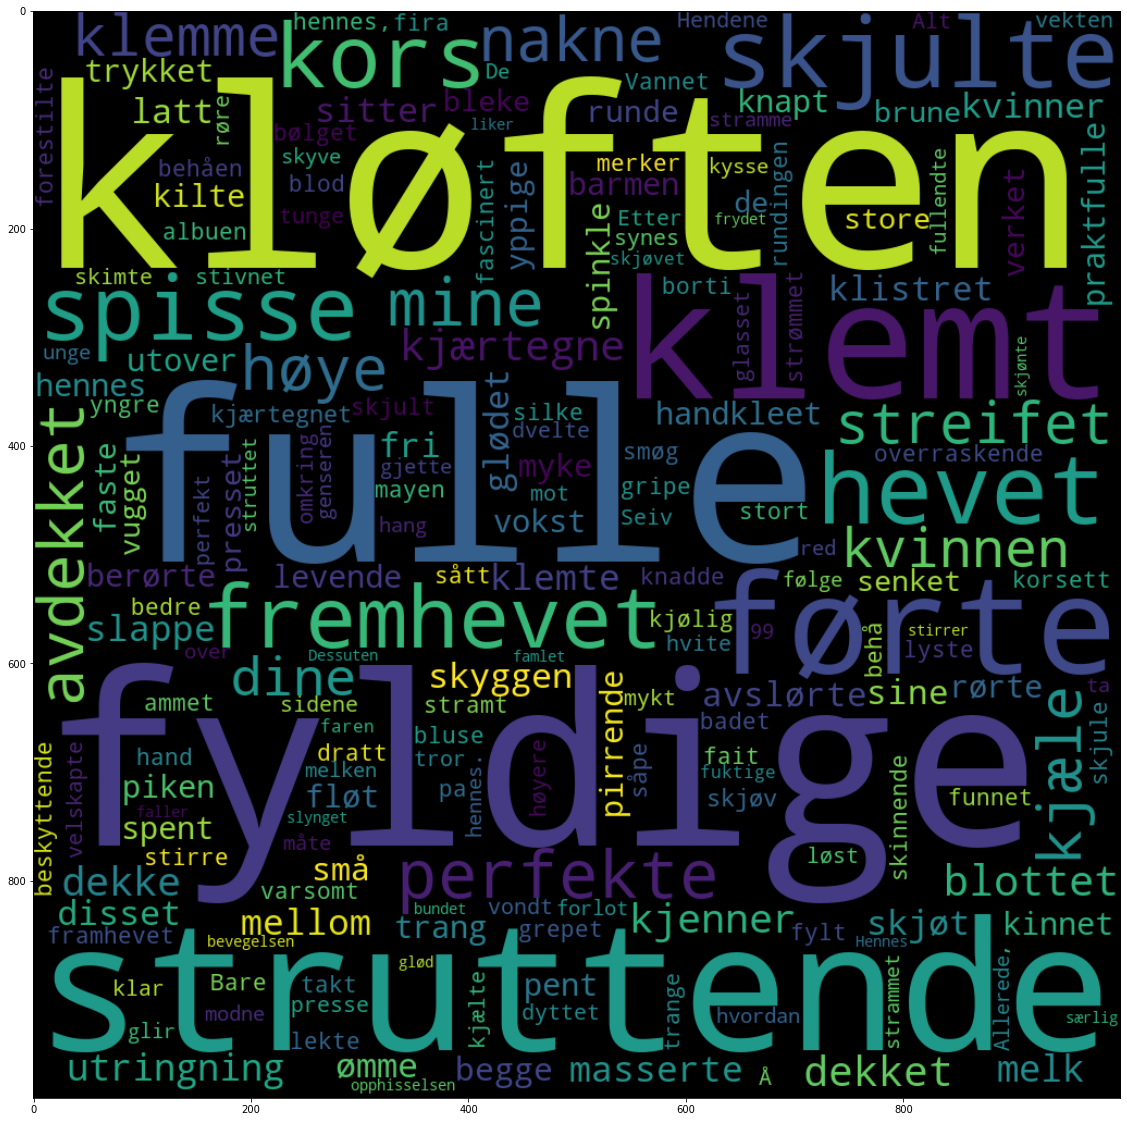

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

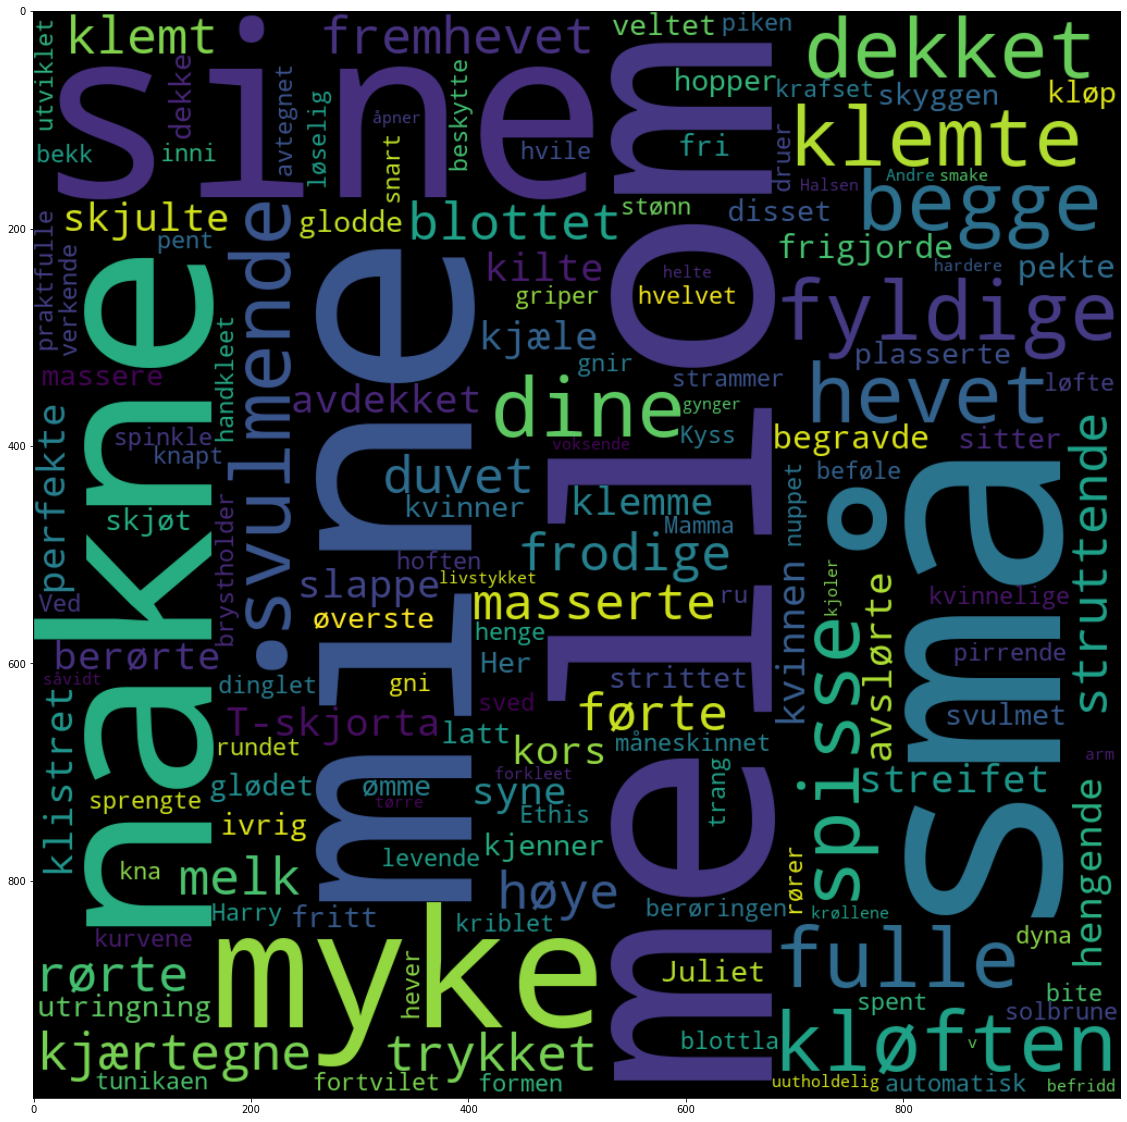

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))